In [5]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df= pd.read_csv(r"C:\Users\Harsh\Desktop\sales_data.csv")   #Dataset 
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])


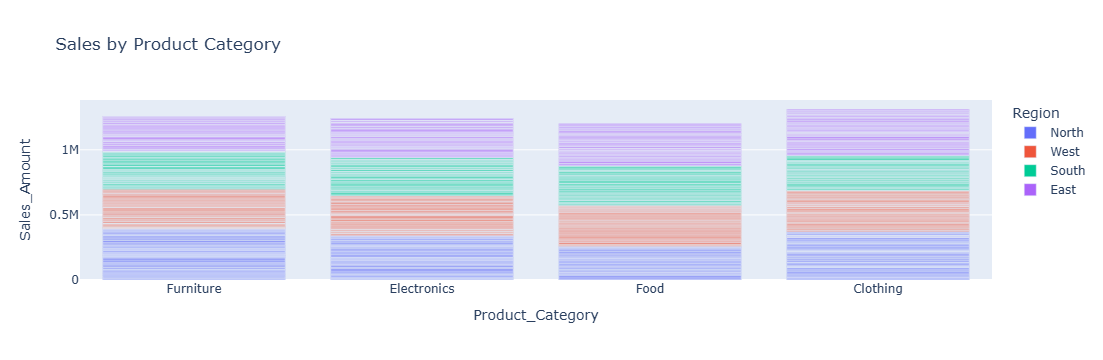

In [7]:
# 1. Sales by Product Category
fig1 = px.bar(df, x='Product_Category', y='Sales_Amount', color='Region',
              title='Sales by Product Category', hover_data=['Sales_Rep'])
fig1.show()

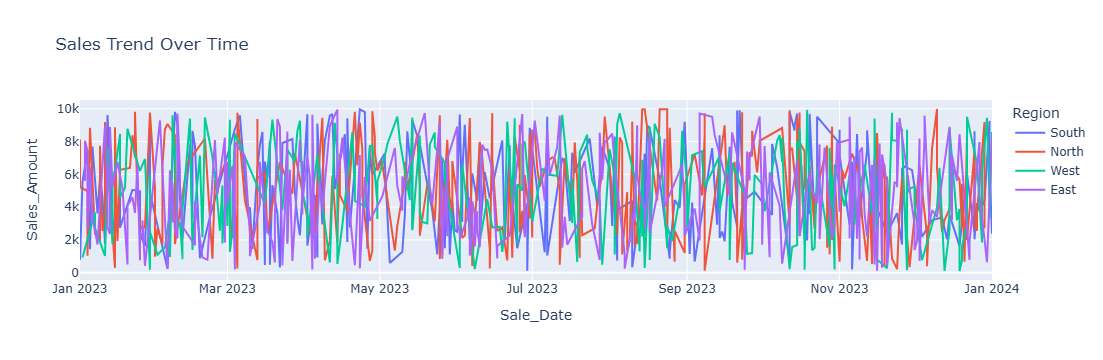

In [8]:
# 2. Sales Trend Over Time
fig2 = px.line(df.sort_values('Sale_Date'), x='Sale_Date', y='Sales_Amount', color='Region',
               title='Sales Trend Over Time')
fig2.show()

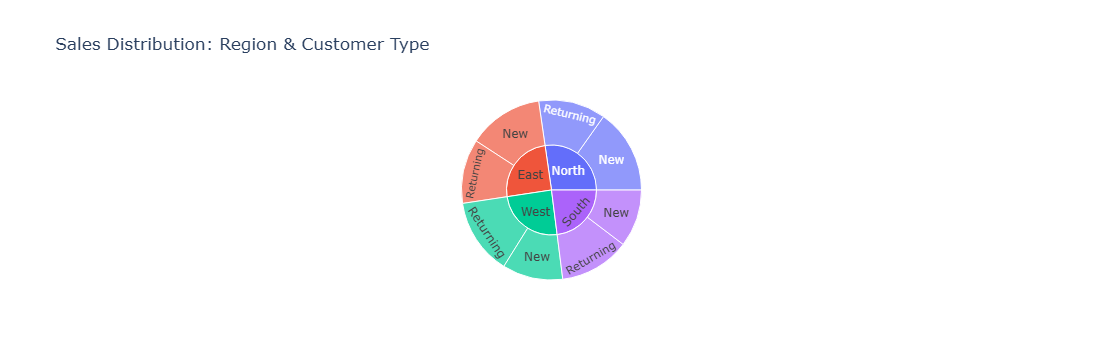

In [9]:
# 3. Sales Distribution by Region and Customer Type
fig3 = px.sunburst(df, path=['Region', 'Customer_Type'], values='Sales_Amount',
                   title='Sales Distribution: Region & Customer Type')
fig3.show()

In [10]:
#Predictive Analysis: Predicting Sales_Amount
features = ['Quantity_Sold', 'Unit_Price', 'Discount']
X = df[features]
y = df['Sales_Amount']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
df['Predicted_Sales'] = model.predict(X) # Add predictions to DataFrame

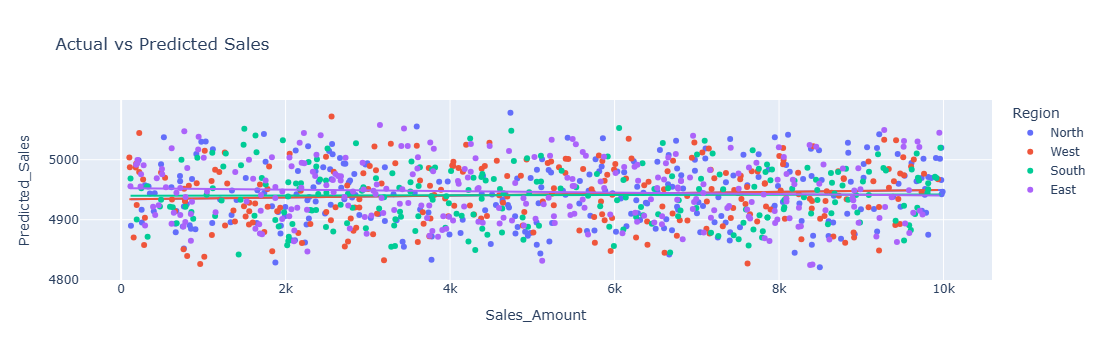

In [13]:
# 4. Actual vs Predicted Sales
fig4 = px.scatter(df, x='Sales_Amount', y='Predicted_Sales', color='Region',
                  title='Actual vs Predicted Sales', trendline='ols')
fig4.show()